In [151]:
# Importar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# Cargar el dataset
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [154]:
# Remover observaciones con campos vacios
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [155]:
# Remover variables que no se utilizaran
df = df.drop(['Country name', 'Regional indicator', 'Ladder score in Dystopia'], axis=1)
df.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [156]:
# Redondear la base de datos con 3 decimales
df = df.round(2)
df.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.84,0.03,7.90,7.78,10.78,0.95,72.0,0.95,-0.10,0.19,1.45,1.11,0.74,0.69,0.12,0.48,3.25
1,7.62,0.04,7.69,7.55,10.93,0.95,72.7,0.95,0.03,0.18,1.50,1.11,0.76,0.69,0.21,0.48,2.87
2,7.57,0.04,7.64,7.50,11.12,0.94,74.4,0.92,0.02,0.29,1.57,1.08,0.82,0.65,0.20,0.41,2.84
3,7.55,0.06,7.67,7.44,10.88,0.98,73.0,0.96,0.16,0.67,1.48,1.17,0.77,0.70,0.29,0.17,2.97
4,7.46,0.03,7.52,7.41,10.93,0.94,72.4,0.91,0.18,0.34,1.50,1.08,0.75,0.65,0.30,0.38,2.80


In [157]:
# Calculo de matrices de varianza-covarianza
cov_matrix = df.cov()
cov_matrix

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.152288,-0.010781,1.130874,1.174477,0.982182,0.092988,5.576155,0.073951,-0.002788,-0.080861,0.342962,0.210330,0.175386,0.089659,-0.001698,0.051609,0.283338
Standard error of ladder score,-0.010781,0.000482,-0.009848,-0.011721,-0.015989,-0.001309,-0.084333,-0.000643,0.000468,0.001055,-0.005591,-0.002966,-0.002648,-0.000791,0.000301,-0.000675,0.001598
upperwhisker,1.130874,-0.009848,1.111309,1.151220,0.950378,0.090369,5.407949,0.072665,-0.001917,-0.078684,0.331842,0.204384,0.170105,0.088080,-0.001138,0.050219,0.286704
lowerwhisker,1.174477,-0.011721,1.151220,1.198559,1.014899,0.095653,5.746730,0.075259,-0.003620,-0.082893,0.354399,0.216371,0.180742,0.091265,-0.002234,0.052911,0.280317
Logged GDP per capita,0.982182,-0.015989,0.950378,1.014899,1.341892,0.104404,6.734192,0.056376,-0.034580,-0.071030,0.468801,0.235464,0.211768,0.068737,-0.022251,0.045242,-0.026228
Social support,0.092988,-0.001309,0.090369,0.095653,0.104404,0.013164,0.560709,0.006209,-0.002021,-0.004117,0.036474,0.029681,0.017615,0.007540,-0.001292,0.002644,0.000249
Healthy life expectancy,5.576155,-0.084333,5.407949,5.746730,6.734192,0.560709,45.727695,0.350775,-0.164514,-0.442768,2.351301,1.266423,1.439154,0.429584,-0.105543,0.281254,-0.089497
Freedom to make life choices,0.073951,-0.000643,0.072665,0.075259,0.056376,0.006209,0.350775,0.012852,0.002896,-0.008172,0.019671,0.014147,0.011035,0.015585,0.001968,0.005215,0.006286
Generosity,-0.002788,0.000468,-0.001917,-0.003620,-0.034580,-0.002021,-0.164514,0.002896,0.022690,-0.004416,-0.012070,-0.004493,-0.005201,0.003478,0.014839,0.002809,-0.002057
Perceptions of corruption,-0.080861,0.001055,-0.078684,-0.082893,-0.071030,-0.004117,-0.442768,-0.008172,-0.004416,0.032095,-0.024796,-0.009353,-0.013908,-0.009911,-0.002935,-0.020498,0.000564


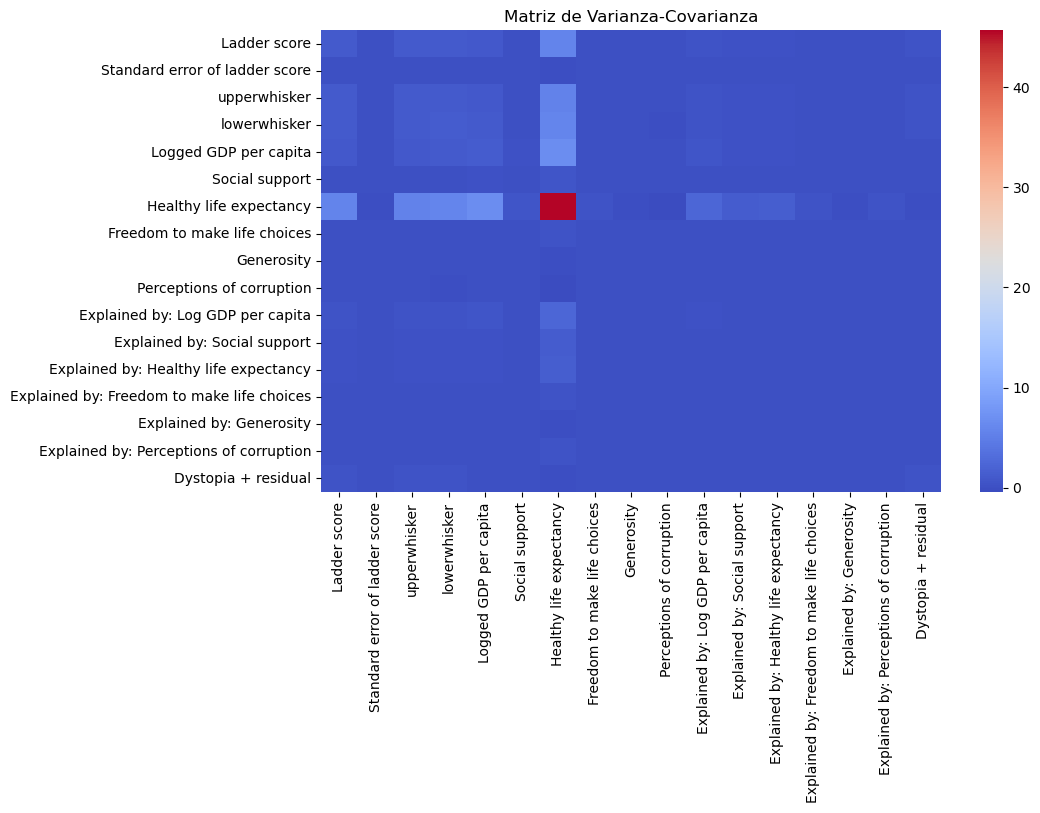

In [158]:
# Grafico de matriz de varianza-covarianza
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Varianza-Covarianza')
plt.show()

In [159]:
# Calculo de la matriz de correlacion
cor_matrix = df.corr(method='spearman').abs()
cor_matrix

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,0.541414,0.999088,0.999274,0.809850,0.794843,0.796535,0.608331,0.005466,0.301200,0.809103,0.798316,0.795555,0.609254,0.001897,0.302056,0.463330
Standard error of ladder score,0.541414,1.000000,0.514916,0.563387,0.667841,0.608269,0.615168,0.325952,0.080701,0.251985,0.667472,0.607477,0.615941,0.329952,0.078430,0.254127,0.119509
upperwhisker,0.999088,0.514916,1.000000,0.997185,0.797260,0.784227,0.786822,0.608169,0.001973,0.301250,0.796477,0.787718,0.785747,0.609124,0.001611,0.302111,0.482894
lowerwhisker,0.999274,0.563387,0.997185,1.000000,0.820104,0.802302,0.803938,0.608771,0.010637,0.300472,0.819323,0.805890,0.803090,0.609701,0.007165,0.301317,0.447153
Logged GDP per capita,0.809850,0.667841,0.797260,0.820104,1.000000,0.792011,0.871532,0.434132,0.150833,0.276676,0.999931,0.793565,0.872854,0.436209,0.147431,0.274832,0.011954
Social support,0.794843,0.608269,0.784227,0.802302,0.792011,1.000000,0.732408,0.485043,0.088049,0.148350,0.791780,0.999244,0.731879,0.483960,0.085715,0.149403,0.055659
Healthy life expectancy,0.796535,0.615168,0.786822,0.803938,0.871532,0.732408,1.000000,0.451350,0.137669,0.261882,0.871253,0.734888,0.999702,0.455043,0.133043,0.259196,0.033757
Freedom to make life choices,0.608331,0.325952,0.608169,0.608771,0.434132,0.485043,0.451350,1.000000,0.202498,0.348315,0.433344,0.490940,0.449681,0.999059,0.209372,0.346955,0.120501
Generosity,0.005466,0.080701,0.001973,0.010637,0.150833,0.088049,0.137669,0.202498,1.000000,0.162591,0.151514,0.086048,0.139972,0.202847,0.999136,0.159957,0.072081
Perceptions of corruption,0.301200,0.251985,0.301250,0.300472,0.276676,0.148350,0.261882,0.348315,0.162591,1.000000,0.278221,0.153729,0.259645,0.348195,0.166228,0.998798,0.062652


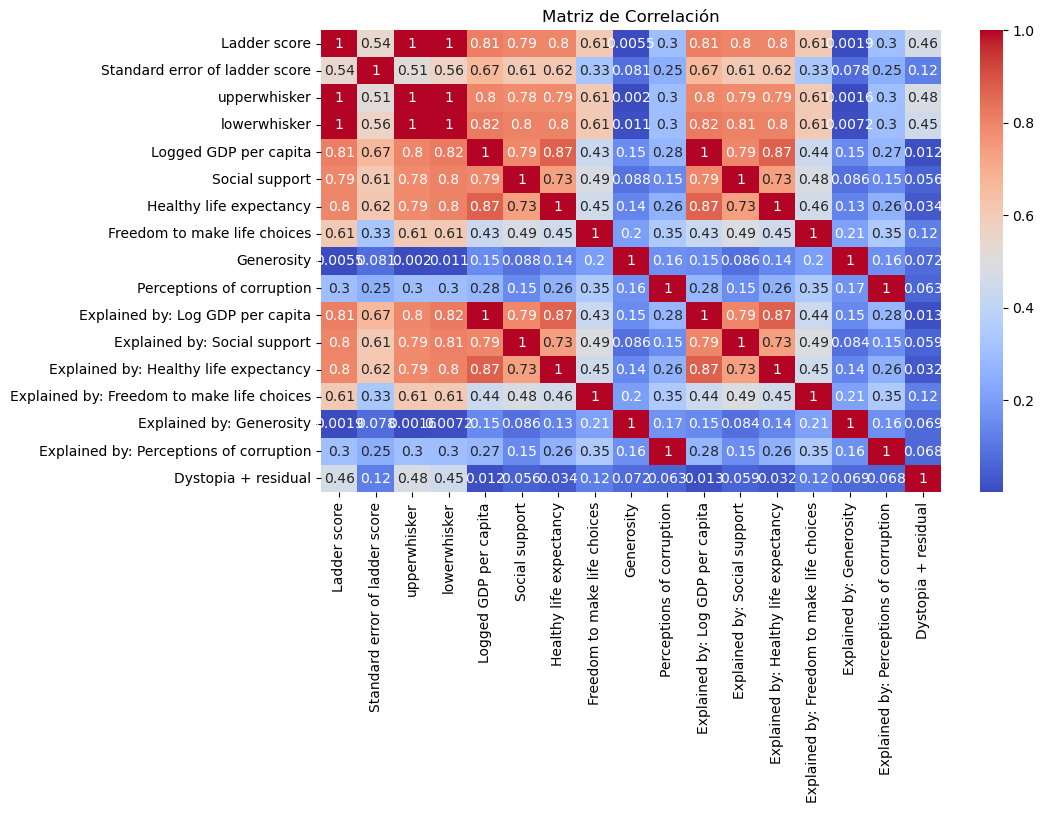

In [160]:
# Grafico de matriz de correlacion
plt.figure(figsize=(10, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [161]:
# Remover variables con baja correlacion
df = df.drop(['Generosity', 'Perceptions of corruption', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis=1)
df.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices
0,7.84,0.03,7.90,7.78,10.78,0.95,72.0,0.95,1.45,1.11,0.74,0.69
1,7.62,0.04,7.69,7.55,10.93,0.95,72.7,0.95,1.50,1.11,0.76,0.69
2,7.57,0.04,7.64,7.50,11.12,0.94,74.4,0.92,1.57,1.08,0.82,0.65
3,7.55,0.06,7.67,7.44,10.88,0.98,73.0,0.96,1.48,1.17,0.77,0.70
4,7.46,0.03,7.52,7.41,10.93,0.94,72.4,0.91,1.50,1.08,0.75,0.65


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Ladder score                                149 non-null    float64
 1   Standard error of ladder score              149 non-null    float64
 2   upperwhisker                                149 non-null    float64
 3   lowerwhisker                                149 non-null    float64
 4   Logged GDP per capita                       149 non-null    float64
 5   Social support                              149 non-null    float64
 6   Healthy life expectancy                     149 non-null    float64
 7   Freedom to make life choices                149 non-null    float64
 8   Explained by: Log GDP per capita            149 non-null    float64
 9   Explained by: Social support                149 non-null    float64
 10  Explained by: 

## Análisis de componentes principales

In [163]:
# Escalar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_scaled = scaler.fit_transform(df)

In [164]:
# Calcular el PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(datos_scaled)

array([[-5.02306333e+00, -8.17238885e-01,  2.62814485e-01, ...,
         4.97402867e-03, -4.25351198e-03, -7.28685967e-05],
       [-4.87184261e+00, -8.00587604e-01,  3.63730519e-01, ...,
        -6.23189105e-03, -9.82364832e-04,  8.16397712e-04],
       [-4.91207627e+00, -3.07093783e-01,  3.96821071e-01, ...,
        -7.90356163e-03, -8.43789026e-03,  8.15164838e-04],
       ...,
       [ 4.20174350e+00, -2.01431199e+00, -2.17761937e+00, ...,
        -5.60033750e-03,  6.04425850e-03,  3.91184640e-03],
       [ 4.50718907e+00,  7.05631585e-01, -1.31867452e+00, ...,
        -2.89845515e-03, -5.84505680e-03, -4.86541539e-03],
       [ 8.00063962e+00,  3.55777555e+00, -1.40083884e+00, ...,
        -7.59171967e-03,  3.91031307e-03, -3.08289647e-03]])

In [165]:
# Obtener tablas de componentes principales y eigenvalores
eigenvalues = pca.explained_variance_
percentage_var = pca.explained_variance_ratio_
acum_percentage_var = np.cumsum(percentage_var)

# Crear tabla de componentes principales
components = range(1, len(eigenvalues) + 1)
components_table = pd.DataFrame({'Component': components, 'Eigenvalue': eigenvalues, 'Explained Variance': percentage_var, 'Cumulative Explained Variance': acum_percentage_var})
components_table

,Component,Eigenvalue,Explained Variance,Cumulative Explained Variance
0,1,8.671389,7.177659e-01,0.717766
1,2,1.448544,1.199018e-01,0.837668
2,3,0.692515,5.732229e-02,0.894990
3,4,0.575379,4.762643e-02,0.942616
4,5,0.446395,3.694990e-02,0.979566
5,6,0.245714,2.033877e-02,0.999905
6,7,0.000667,5.521351e-05,0.999960
7,8,0.000293,2.429124e-05,0.999985
8,9,0.000091,7.517545e-06,0.999992
9,10,0.000057,4.758213e-06,0.999997


In [166]:
def screen_plot(components_table):
    percentages = components_table['Explained Variance']
    acumulados = components_table['Cumulative Explained Variance']

    # Gráfico de Scree Plot
    plt.figure(figsize=(8, 5))
    plt.bar(np.arange(1, len(percentages) + 1), acumulados * 100, color="red", zorder=2, alpha=0.7, label='Acumulado')
    plt.bar(np.arange(1, len(percentages) + 1), percentages * 100, color="blue", zorder=3, alpha=0.7, label='Porcentaje')
    plt.title('Scree Plot')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Porcentaje de Varianza Explicada')
    plt.xlim(0, len(percentages) + 1)
    plt.ylim(0, 100)
    plt.xticks(np.arange(1, len(percentages) + 1))
    plt.yticks(np.arange(0, 101, 10))
    plt.grid(axis='y', linestyle='--', zorder=0)
    plt.legend()
    plt.show()

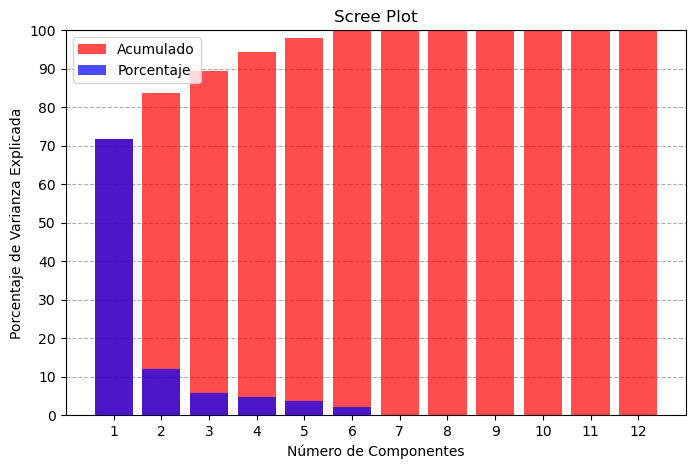

In [167]:
screen_plot(components_table)

In [168]:
# Obtener las cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_table = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(1, len(loadings) + 1)], index=df.columns)
loadings_table.abs()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Ladder score,0.931464,0.112064,0.265881,0.095022,0.214082,0.031849,0.000111,0.000188,0.000050,0.000283,3.445305e-04,0.002213
Standard error of ladder score,0.618116,0.341409,0.595092,0.029482,0.379576,0.095118,0.000023,0.000151,0.000030,0.000406,3.291974e-05,0.000008
upperwhisker,0.922926,0.127991,0.294487,0.098129,0.203404,0.028773,0.000181,0.001242,0.000295,0.005048,5.420731e-04,0.001196
lowerwhisker,0.938475,0.096371,0.238128,0.092054,0.224418,0.034037,0.000149,0.001065,0.000254,0.005535,2.133118e-04,0.001014
Logged GDP per capita,0.918734,0.263595,0.050937,0.065212,0.068084,0.285839,0.000112,0.000415,0.000464,0.000496,3.809050e-03,0.000157
Social support,0.875986,0.114238,0.069170,0.457463,0.092739,0.059580,0.002024,0.011949,0.000192,0.000516,8.908054e-05,0.000038
Healthy life expectancy,0.898425,0.203116,0.057789,0.245928,0.253444,0.173874,0.000764,0.000389,0.006718,0.000196,2.726530e-04,0.000007
Freedom to make life choices,0.651473,0.724992,0.224988,0.008520,0.068325,0.032193,0.018130,0.001349,0.000346,0.000003,4.472412e-07,0.000008
Explained by: Log GDP per capita,0.918434,0.264201,0.051446,0.064617,0.067457,0.286436,0.000132,0.000340,0.000456,0.000515,3.803970e-03,0.000156
Explained by: Social support,0.877808,0.109789,0.066048,0.455767,0.090027,0.061781,0.001986,0.011994,0.000209,0.000521,8.841403e-05,0.000039


In [169]:
def plot_biplot(res_pca, loadings, datos, a=5.0):
    # Biplot de PCA
    sns.scatterplot(x=res_pca[:, 0], y=res_pca[:, 1], alpha=0.8, color='b')
    for i, columna in enumerate(datos.columns):
        plt.arrow(0, 0, a*loadings[i, 0], a*loadings[i, 1], color='r', alpha=0.5)
        plt.text(loadings[i, 0]*(a + 0.15), loadings[i, 1]*(a + 0.15), columna, color='g', ha='center', va='center')
    plt.grid()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot de PCA')
    plt.show()

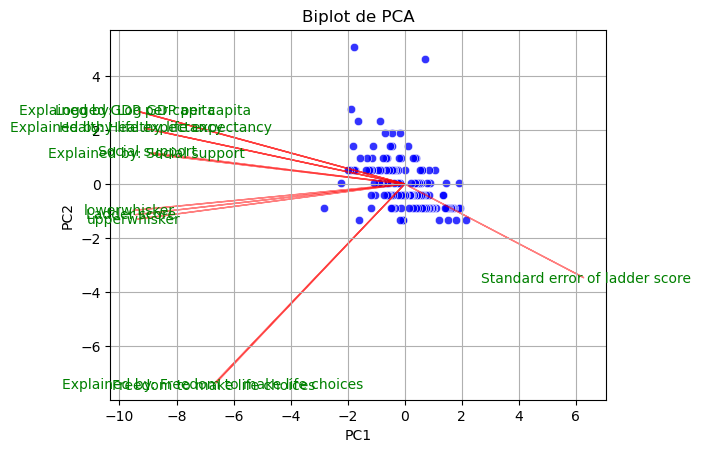

In [170]:
plot_biplot(datos_scaled, loadings, df, a=10.15)